In [1]:
# import  libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style 
sns.set(style="whitegrid")

In [3]:
file_path = 'data_files/WA_Fn-UseC_-Telco-Customer-Churn.csv'

# Load the dataset
df = pd.read_csv(file_path)

print("Data loaded successfully!")
print(df.head())

Data loaded successfully!
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingM

In [5]:
# Get a summary of the dataframe
print("\nDataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  70

In [7]:
# The 'TotalCharges' column should be numeric but is an object type.
# convert it to a numeric type, coercing errors into NaN (Not a Number).
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [9]:
# Now, check for missing values again.
print("\nMissing Values per Column:")
print(df.isnull().sum())


Missing Values per Column:
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [11]:
# Drop the few rows with missing TotalCharges
df.dropna(inplace=True)

# Convert the 'Churn' column from 'Yes'/'No' to 1/0 for easier analysis
df['Churn_numeric'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)


In [13]:
# drop the customerID 
df.drop('customerID', axis=1, inplace=True)

print(f"\nDataset is now clean with {df.shape[0]} rows.")


Dataset is now clean with 7032 rows.


In [15]:
# Calculate churn rate
churn_rate = df['Churn_numeric'].mean()
print(f"Overall Customer Churn Rate: {churn_rate:.2%}")

Overall Customer Churn Rate: 26.58%


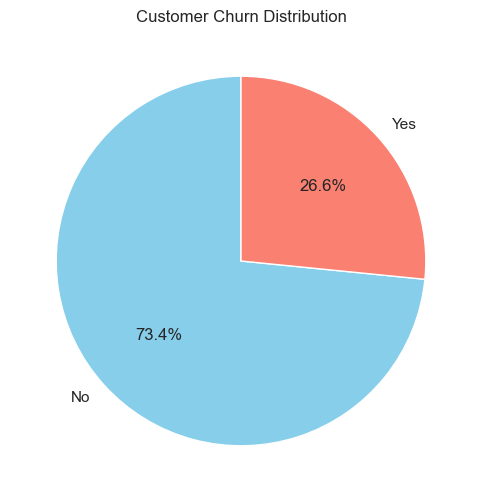

In [17]:
# Visualize the churn distribution
plt.figure(figsize=(6, 6))
df['Churn'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'salmon'], startangle=90)
plt.title('Customer Churn Distribution')
plt.ylabel('') # Hide the y-label
plt.show()

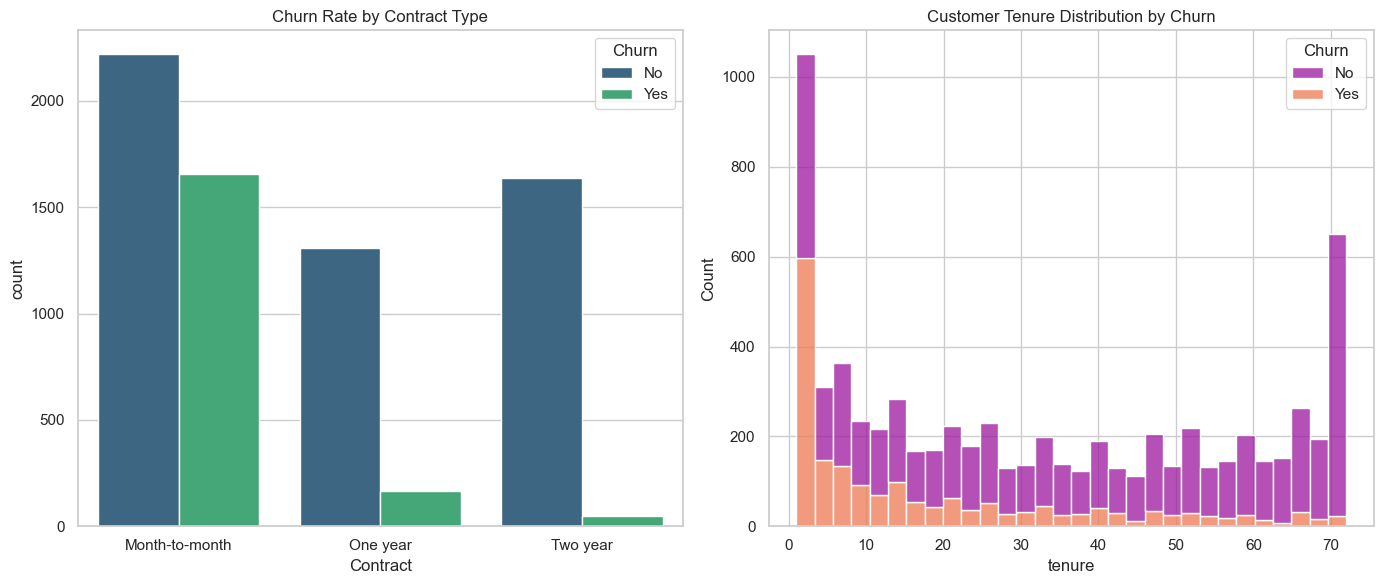

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Churn by Contract Type
sns.countplot(data=df, x='Contract', hue='Churn', ax=ax[0], palette='viridis')
ax[0].set_title('Churn Rate by Contract Type')

# Churn by Tenure
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', ax=ax[1], palette='plasma', bins=30)
ax[1].set_title('Customer Tenure Distribution by Churn')

plt.tight_layout()
plt.show()

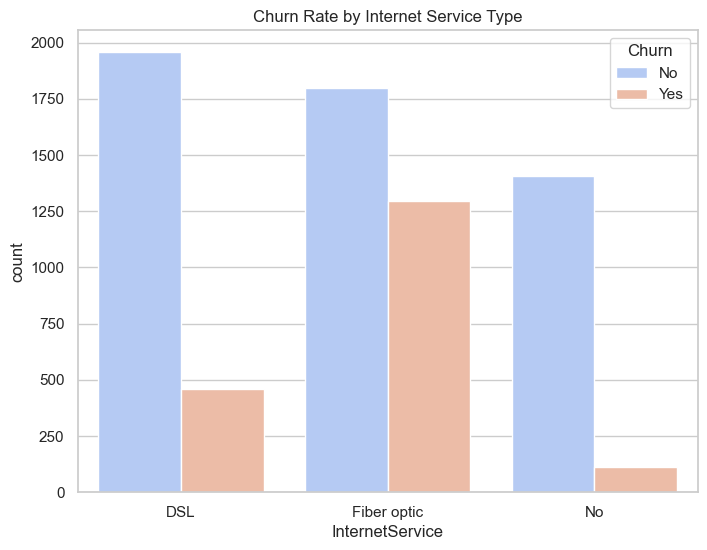

In [21]:
# Let's look at internet service
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='InternetService', hue='Churn', palette='coolwarm')
plt.title('Churn Rate by Internet Service Type')
plt.show()

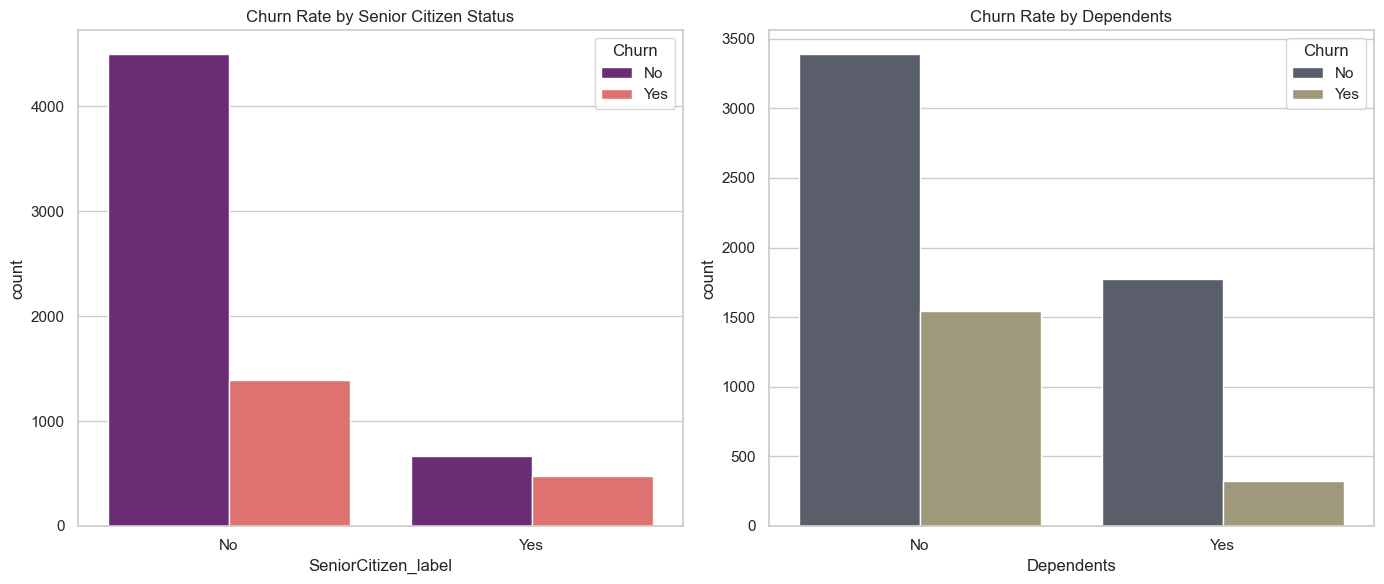

In [23]:
# Convert SeniorCitizen from 0/1 to Yes/No for clarity in plotting
df['SeniorCitizen_label'] = df['SeniorCitizen'].apply(lambda x: 'Yes' if x == 1 else 'No')

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Churn by Senior Citizen status
sns.countplot(data=df, x='SeniorCitizen_label', hue='Churn', ax=ax[0], palette='magma')
ax[0].set_title('Churn Rate by Senior Citizen Status')

# Churn by Dependents
sns.countplot(data=df, x='Dependents', hue='Churn', ax=ax[1], palette='cividis')
ax[1].set_title('Churn Rate by Dependents')

plt.tight_layout()
plt.show()

***The analysis of Telco customer data showed a clear profile of a high-risk customer. The results indicated that customers on month-to-month contracts with low tenure churned at a significantly higher rate. This insight proves that contract length is a powerful tool for retention and that the company should focus on converting flexible-contract customers to long-term plans.***